# Sentiment Analysis Predictive Vol.2

In [1]:
import pandas as pd
from googletrans import Translator

In [2]:
df = pd.read_csv('hasil_polaritas.csv')

In [3]:
df.head()

Unnamed: 0                      created_at  reply_count  retweet_count  \
0           0  Thu Dec 14 05:15:57 +0000 2023            0            0.0   
1           1  Thu Dec 14 04:32:00 +0000 2023            0            0.0   
2           2  Thu Dec 14 03:16:38 +0000 2023            0            0.0   
3           3  Thu Dec 14 03:15:17 +0000 2023            0            0.0   
4           4  Thu Dec 14 03:13:31 +0000 2023            0            0.0   

   favorite_count         username  \
0             0.0     PkbPurworejo   
1             0.0      BaladewaDon   
2             0.0  sahrulmartenank   
3             0.0         AmLoebis   
4             0.0         AmLoebis   

                                           tweet_url        Kandidat  \
0  https://twitter.com/PkbPurworejo/status/173516...  Anies-Muhaimin   
1  https://twitter.com/BaladewaDon/status/1735155...  Anies-Muhaimin   
2  https://twitter.com/sahrulmartenank/status/173...  Anies-Muhaimin   
3  https://twitter.com/AmLoebis/status/1735136350...  Anies-Muhaimin   
4  https://twitter.com/AmLoebis/status/1735135902...  Anies-Muhaimin   

                                              tweets  sentiment_polarity  \
0  Nahdliyin Women's Network for ANIS MUHAIMIN To...               0.050   
1  After seeing yesterday's debate, without think...               0.125   
2   Fill in the comments many Anis Muhaimin AMIN win               0.650   
3                 That's really great, Anis Muhaimin               0.800   
4  Anies Ampe stick out your tongue like that, An...               0.000   

  sentiment  
0   Positif  
1   Positif  
2   Positif  
3   Positif  
4    Netral

In [4]:
polarity = pd.concat([df['sentiment_polarity'], df['sentiment']], axis=1)

In [5]:
polarity

sentiment_polarity sentiment
0                  0.0500   Positif
1                  0.1250   Positif
2                  0.6500   Positif
3                  0.8000   Positif
4                  0.0000    Netral
...                   ...       ...
10374              0.0000    Netral
10375              0.0000    Netral
10376              0.2875   Positif
10377              0.5000   Positif
10378             -0.0125   Negatif

[10379 rows x 2 columns]

In [6]:
df_sentiment = pd.read_csv('tweet_bersih.csv')

In [7]:
sentiment = pd.concat([df_sentiment, polarity], axis=1)

In [8]:
sentiment.head()

Unnamed: 0                      created_at  \
0           0  Thu Dec 14 05:15:57 +0000 2023   
1           1  Thu Dec 14 04:32:00 +0000 2023   
2           2  Thu Dec 14 03:16:38 +0000 2023   
3           3  Thu Dec 14 03:15:17 +0000 2023   
4           4  Thu Dec 14 03:13:31 +0000 2023   

                                           full_text  quote_count  \
0  Jaringan Perempuan Nahdliyin untuk ANIS MUHAIM...          0.0   
1  Setelah melihat debat kemaren tanpa pikir panj...          0.0   
2         Isi Komen banyak Anis Muhaimin AMIN menang          0.0   
3                Telak banget ya AnisMuhaimin mantap          0.0   
4  anies Ampe julurin lidah ya kayak itu tu AnisM...          0.0   

   reply_count  retweet_count  favorite_count         username  \
0            0            0.0             0.0     PkbPurworejo   
1            0            0.0             0.0      BaladewaDon   
2            0            0.0             0.0  sahrulmartenank   
3            0            0.0             0.0         AmLoebis   
4            0            0.0             0.0         AmLoebis   

                                           tweet_url        Kandidat  \
0  https://twitter.com/PkbPurworejo/status/173516...  Anies-Muhaimin   
1  https://twitter.com/BaladewaDon/status/1735155...  Anies-Muhaimin   
2  https://twitter.com/sahrulmartenank/status/173...  Anies-Muhaimin   
3  https://twitter.com/AmLoebis/status/1735136350...  Anies-Muhaimin   
4  https://twitter.com/AmLoebis/status/1735135902...  Anies-Muhaimin   

   sentiment_polarity sentiment  
0               0.050   Positif  
1               0.125   Positif  
2               0.650   Positif  
3               0.800   Positif  
4               0.000    Netral

In [9]:
sentiment.isna().sum()

Unnamed: 0            0
created_at            0
full_text             0
quote_count           0
reply_count           0
retweet_count         0
favorite_count        0
username              0
tweet_url             0
Kandidat              0
sentiment_polarity    0
sentiment             0
dtype: int64

In [10]:
sentiment.duplicated().sum()

0

## Data Processing

In [11]:
sentiment.head(15)

Unnamed: 0                      created_at  \
0            0  Thu Dec 14 05:15:57 +0000 2023   
1            1  Thu Dec 14 04:32:00 +0000 2023   
2            2  Thu Dec 14 03:16:38 +0000 2023   
3            3  Thu Dec 14 03:15:17 +0000 2023   
4            4  Thu Dec 14 03:13:31 +0000 2023   
5            5  Thu Dec 14 00:39:27 +0000 2023   
6            6  Wed Dec 13 23:47:40 +0000 2023   
7            7  Wed Dec 13 23:41:37 +0000 2023   
8            8  Wed Dec 13 23:19:38 +0000 2023   
9            9  Wed Dec 13 23:00:26 +0000 2023   
10          10  Wed Dec 13 19:38:37 +0000 2023   
11          11  Wed Dec 13 16:31:57 +0000 2023   
12          12  Wed Dec 13 14:07:38 +0000 2023   
13          13  Wed Dec 13 14:01:19 +0000 2023   
14          14  Wed Dec 13 13:45:51 +0000 2023   

                                            full_text  quote_count  \
0   Jaringan Perempuan Nahdliyin untuk ANIS MUHAIM...          0.0   
1   Setelah melihat debat kemaren tanpa pikir panj...          0.0   
2          Isi Komen banyak Anis Muhaimin AMIN menang          0.0   
3                 Telak banget ya AnisMuhaimin mantap          0.0   
4   anies Ampe julurin lidah ya kayak itu tu AnisM...          0.0   
5   Smg psngn amin anis muhaimin yg alloh kehendak...          0.0   
6   ar Bismillah smg alloh takdirkan no urut 01 yg...          0.0   
7   AntiPKI9 Sy susah mau ngomong apa pokok nya An...          0.0   
8   Semoga sehat pak prabowo dan bisa menyaksikan ...          5.0   
9   Untuk rakyat yg ingin perubahan pilih anis muh...          0.0   
10  munas Maklum kang munas yg sebelah mulai kebak...          0.0   
11  Insya Allah pak bersama pak anis Muhaimin kema...          0.0   
12  Tak ada debat pun saya sekeluarga akan tetap m...          0.0   
13  hmm calon presiden dan wakil nya berkasus di k...          0.0   
14  Anis Muhaimin berkasus di kpk cek kasus nya di...          0.0   

    reply_count  retweet_count  favorite_count         username  \
0             0            0.0             0.0     PkbPurworejo   
1             0            0.0             0.0      BaladewaDon   
2             0            0.0             0.0  sahrulmartenank   
3             0            0.0             0.0         AmLoebis   
4             0            0.0             0.0         AmLoebis   
5             0            0.0             0.0         lutnisah   
6             0            0.0             4.0         lutnisah   
7             0            0.0             0.0      AkhirZainul   
8            38           19.0           592.0    lukmandede799   
9             0            0.0             0.0  Rafika339531222   
10            0            0.0             2.0    iqbalcandrabu   
11            0            0.0             1.0     _manajanjimu   
12            0            0.0             1.0  Pemanah60139933   
13            0            0.0             0.0    Rusky69315101   
14            0            0.0             0.0    Rusky69315101   

                                            tweet_url        Kandidat  \
0   https://twitter.com/PkbPurworejo/status/173516...  Anies-Muhaimin   
1   https://twitter.com/BaladewaDon/status/1735155...  Anies-Muhaimin   
2   https://twitter.com/sahrulmartenank/status/173...  Anies-Muhaimin   
3   https://twitter.com/AmLoebis/status/1735136350...  Anies-Muhaimin   
4   https://twitter.com/AmLoebis/status/1735135902...  Anies-Muhaimin   
5   https://twitter.com/lutnisah/status/1735097131...  Anies-Muhaimin   
6   https://twitter.com/lutnisah/status/1735084102...  Anies-Muhaimin   
7   https://twitter.com/AkhirZainul/status/1735082...  Anies-Muhaimin   
8   https://twitter.com/lukmandede799/status/17350...  Anies-Muhaimin   
9   https://twitter.com/Rafika339531222/status/173...  Anies-Muhaimin   
10  https://twitter.com/iqbalcandrabu/status/17350...  Anies-Muhaimin   
11  https://twitter.com/_manajanjimu/status/173497...  Anies-Muhaimin   
12  https://twitter.com/Pemanah60139933/status/173...  Anies

In [156]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10379 entries, 0 to 10378
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10379 non-null  int64  
 1   created_at          10379 non-null  object 
 2   full_text           10379 non-null  object 
 3   quote_count         10379 non-null  float64
 4   reply_count         10379 non-null  int64  
 5   retweet_count       10379 non-null  float64
 6   favorite_count      10379 non-null  float64
 7   username            10379 non-null  object 
 8   tweet_url           10379 non-null  object 
 9   Kandidat            10379 non-null  object 
 10  sentiment_polarity  10379 non-null  float64
 11  sentiment           10379 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 973.2+ KB


## Data Vizualitation

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

### Jumlah Sentiment masing-masing Kandidat

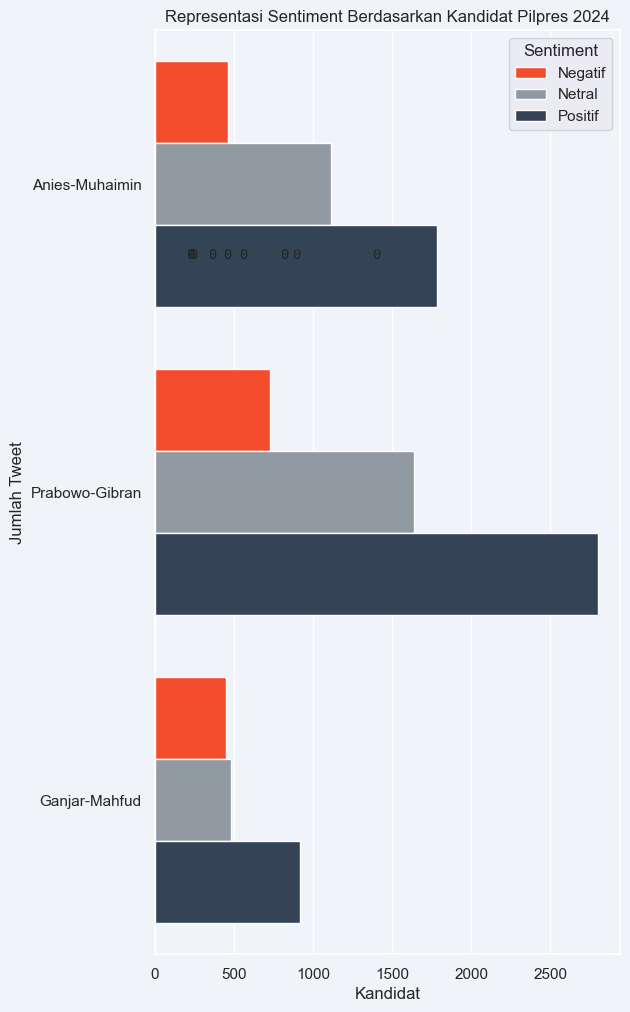

In [336]:
sns.set_theme()
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
#count_data = df.groupby(['Kandidat', 'sentiment']).size().reset_index(name='Count')
count_data = df.groupby(['Kandidat', 'sentiment']).size().reset_index(name='Count')

# Membuat bar plot
plt.figure(figsize=(6, 12), facecolor='#F0F3F8')
ax = sns.barplot(x='Count', y='Kandidat', hue='sentiment', data=count_data, order=['Anies-Muhaimin', 'Prabowo-Gibran', 'Ganjar-Mahfud'], color='#2E425A')  # Sesuaikan dengan data 'Count' yang dihasilkan dari groupby

# Menambahkan teks di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=10, fontfamily='monospace')

# Mengganti warna bar pertama dari setiap kandidat
bar_width = len(count_data['Kandidat'].unique())
for i in range(bar_width):
    ax.patches[i].set_facecolor('#F44D2D')  

plt.title('Representasi Sentiment Berdasarkan Kandidat Pilpres 2024')
plt.xlabel('Kandidat')
plt.ylabel('Jumlah Tweet')
plt.legend(title='Sentiment', loc='upper right')

ax.set_facecolor('#F0F3F8')

plt.show()

## Sentiment Tweets Anies-Muhaimin

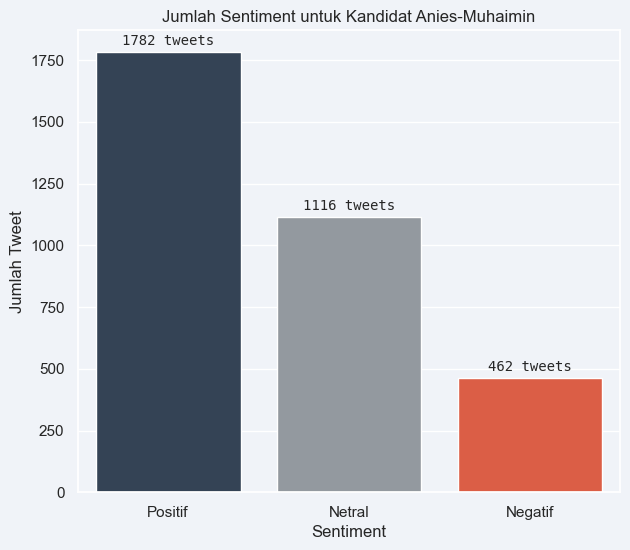

In [279]:
colors = ['#2E425A', '#9199A1', '#F44D2D']

df_anies = sentiment[sentiment['Kandidat'] == 'Anies-Muhaimin']

# Barplot pertama
plt.figure(figsize=(7, 6), facecolor='#F0F3F8')
ax = sns.countplot(x='sentiment', data=df_anies, order=['Positif', 'Netral', 'Negatif'], palette=colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} tweets', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=10, fontfamily='monospace')

plt.title('Jumlah Sentiment untuk Kandidat Anies-Muhaimin')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah Tweet')
ax.set_facecolor('#F0F3F8')
plt.show()

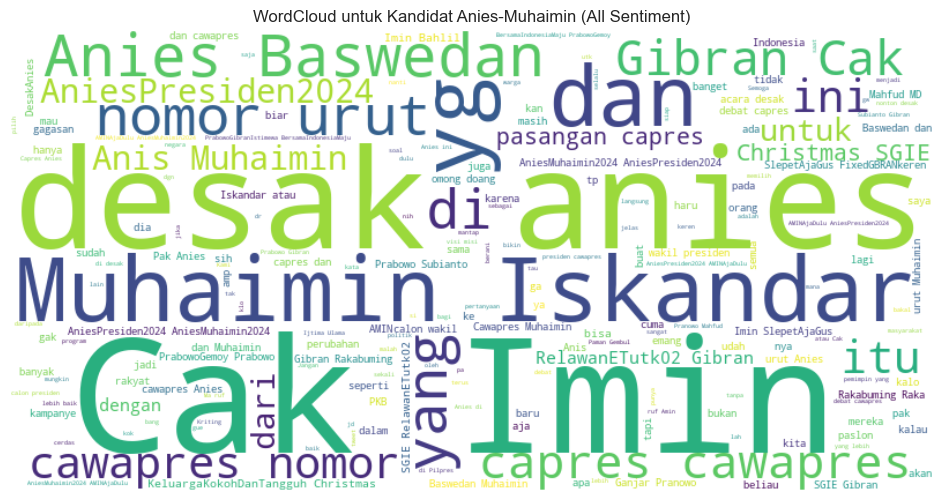

In [284]:
df_anies = sentiment[sentiment['Kandidat'] == 'Anies-Muhaimin']

teks_anies = ' '.join(df_anies['full_text'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(teks_anies)

# Menampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud untuk Kandidat Anies-Muhaimin (All Sentiment)')
plt.show()

## Sentiment Tweets Prabowo-Gibran

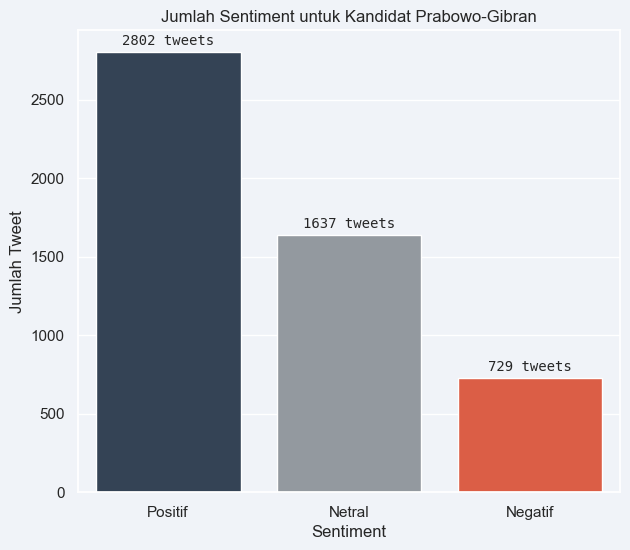

In [288]:
colors = ['#2E425A', '#9199A1', '#F44D2D']

df_prabowo = sentiment[sentiment['Kandidat'] == 'Prabowo-Gibran']

# Barplot pertama
plt.figure(figsize=(7, 6), facecolor='#F0F3F8')
ax = sns.countplot(x='sentiment', data=df_prabowo, order=['Positif', 'Netral', 'Negatif'], palette=colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} tweets', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=10, fontfamily='monospace')

plt.title('Jumlah Sentiment untuk Kandidat Prabowo-Gibran')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah Tweet')
ax.set_facecolor('#F0F3F8')
plt.show()

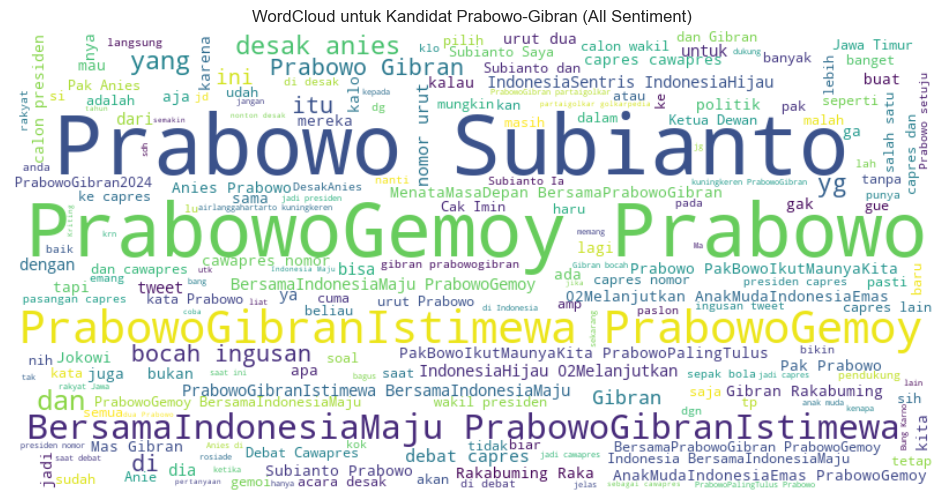

In [290]:
df_prabowo = sentiment[sentiment['Kandidat'] == 'Prabowo-Gibran']

teks_anies = ' '.join(df_prabowo['full_text'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(teks_anies)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud untuk Kandidat Prabowo-Gibran (All Sentiment)')
plt.show()

## Sentiment Tweets Ganjar-Mahfud

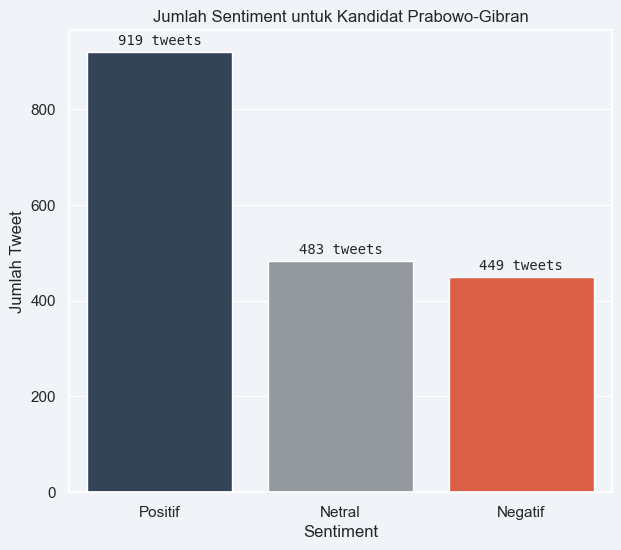

In [289]:
colors = ['#2E425A', '#9199A1', '#F44D2D']

df_ganjar = sentiment[sentiment['Kandidat'] == 'Ganjar-Mahfud']

# Barplot pertama
plt.figure(figsize=(7, 6), facecolor='#F0F3F8')
ax = sns.countplot(x='sentiment', data=df_ganjar, order=['Positif', 'Netral', 'Negatif'], palette=colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} tweets', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=10, fontfamily='monospace')

plt.title('Jumlah Sentiment untuk Kandidat Ganjar-Mahfud')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah Tweet')
ax.set_facecolor('#F0F3F8')
plt.show()

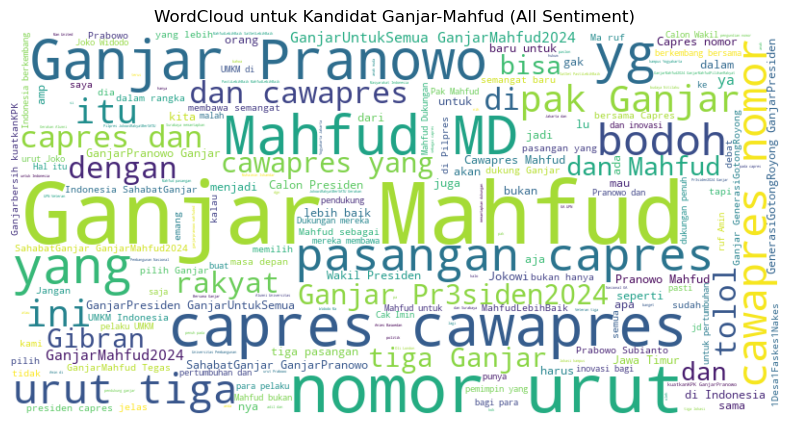

In [19]:
df_ganjar = sentiment[sentiment['Kandidat'] == 'Ganjar-Mahfud']

teks_anies = ' '.join(df_ganjar['full_text'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(teks_anies)

# Menampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud untuk Kandidat Ganjar-Mahfud (All Sentiment)')
plt.show()

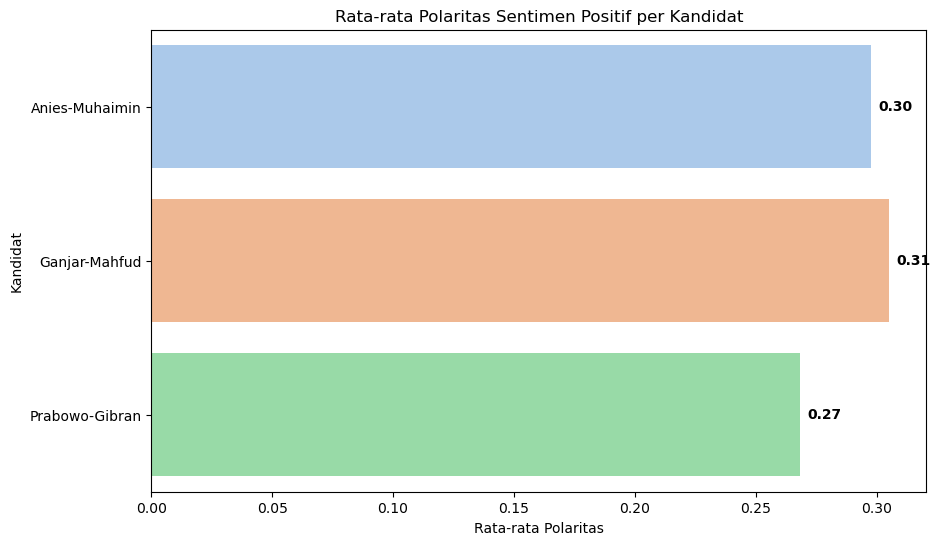

In [123]:
df_positif = df[df['sentiment'] == 'Positif']

# rata-rata polaritas untuk setiap kandidat
rata_rata_polaritas = df_positif.groupby('Kandidat')['sentiment_polarity'].mean().reset_index()

# Plot seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=rata_rata_polaritas, x='sentiment_polarity', y='Kandidat')


for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}', (width, p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=10, fontweight='bold')

plt.title('Rata-rata Polaritas Sentimen Positif per Kandidat')
plt.xlabel('Rata-rata Polaritas')
plt.ylabel('Kandidat')
plt.show()

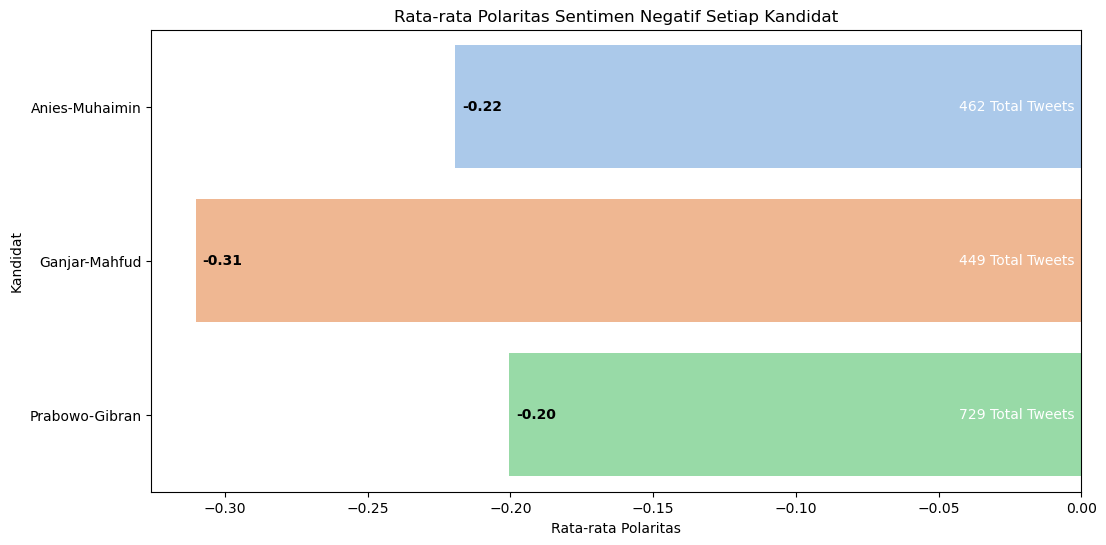

In [118]:
df_negatif = sentiment[sentiment['sentiment'] == 'Negatif']

# rata-rata polaritas untuk setiap kandidat
rata_rata_polaritas = df_negatif.groupby('Kandidat')['sentiment_polarity'].mean().reset_index()

# Plot seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=rata_rata_polaritas, x='sentiment_polarity', y='Kandidat')

# 
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}', (width, p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=10, fontweight='bold')

# Menambahkan jumlah di sebelah nilai rata-rata
for idx, row in rata_rata_polaritas.iterrows():
    ax.annotate(f'{df_negatif[df_negatif["Kandidat"] == row["Kandidat"]].shape[0]} Total Tweets', (0, idx), ha='right', va='center', xytext=(-5, 0), textcoords='offset points', fontsize=10, color='gray')

plt.title('Rata-rata Polaritas Sentimen Negatif Setiap Kandidat')
plt.xlabel('Rata-rata Polaritas')
plt.ylabel('Kandidat')
plt.show()

- Dari visualiasi tersebut dapat disimpulkan bahwa kandidat Ganjar-Mahfud memiliki score rata-rata polaritas sentiment negatif tertinggi walaupun bukan mereka yang memiliki tweets dengan sentiment negatif terbanyak, artinya mayoritas opini/tweets masyarakat yang sifatnya negatif relatif lebih banyak.

In [71]:
df_positif = sentiment[sentiment['sentiment'] == 'Positif']

# Hitung rata-rata polaritas untuk setiap kandidat
rata_rata_polaritas = df_positif.groupby('Kandidat')['sentiment_polarity'].mean()

# Tampilkan hasil
print(rata_rata_polaritas)

Kandidat
Anies-Muhaimin    0.297699
Ganjar-Mahfud     0.305353
Prabowo-Gibran    0.268398
Name: sentiment_polarity, dtype: float64


In [130]:
kalimat_terrendah = sentiment.loc[sentiment.groupby('Kandidat')['sentiment_polarity'].idxmin()]

# Tampilkan kalimat-kalimat dengan nilai polaritas paling rendah
print(kalimat_terrendah[['Kandidat', 'full_text', 'sentiment_polarity']])

             Kandidat                                          full_text  \
1172   Anies-Muhaimin              Fitnah memang kejam AniesPresiden2024   
10003   Ganjar-Mahfud  bahrawi chotimah2 Ayo hina caci maki pitnah tr...   
4179   Prabowo-Gibran  Anies Serang Prabowo dengan Bicara Soal Ordal ...   

       sentiment_polarity  
1172            -1.000000  
10003           -0.933333  
4179            -1.000000  


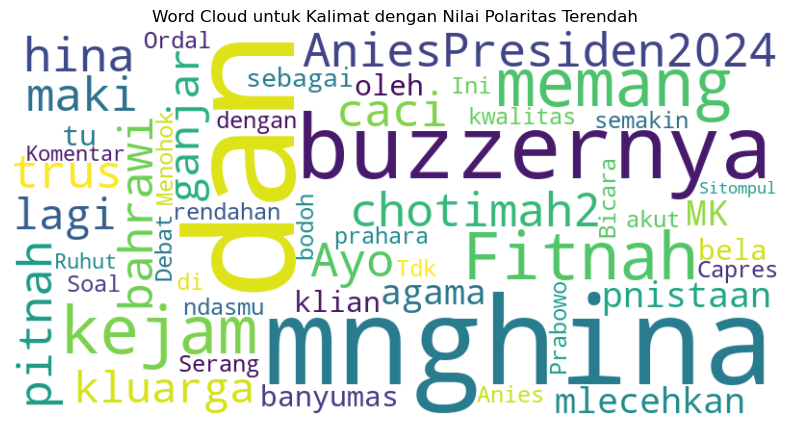

In [133]:
all_text = ' '.join(kalimat_terrendah['full_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Kalimat dengan Nilai Polaritas Terendah')
plt.show()

In [135]:
kalimat_tertinggi = sentiment.loc[sentiment.groupby('Kandidat')['sentiment_polarity'].idxmax()]

print(kalimat_tertinggi[['Kandidat', 'full_text', 'sentiment_polarity']])

            Kandidat                                          full_text  \
43    Anies-Muhaimin  PILIHAN TERBAIK CAPRES CAWAPRES AMIN ANIS MUHA...   
8528   Ganjar-Mahfud  Pemimpin terbaik emang Ganjar Mahfud ini 1Desa...   
3891  Prabowo-Gibran  lira PrabowoGibran2024 itu pilihan terbaikku u...   

      sentiment_polarity  
43                   1.0  
8528                 1.0  
3891                 1.0  


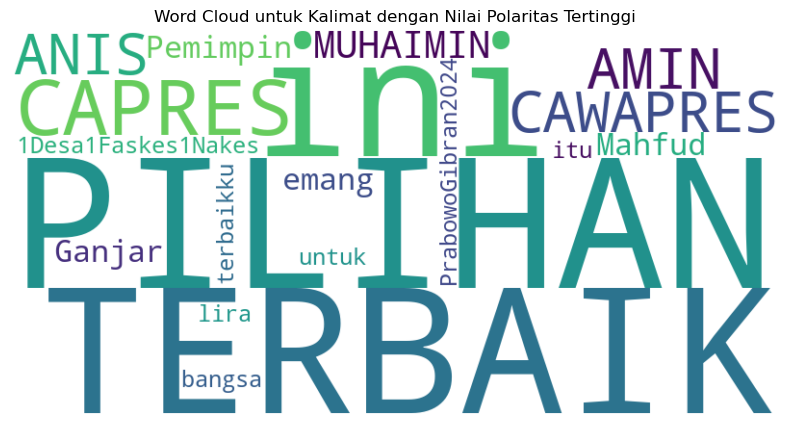

In [136]:
all_text = ' '.join(kalimat_tertinggi['full_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Kalimat dengan Nilai Polaritas Tertinggi')
plt.show()

In [140]:
df_sorted = sentiment.sort_values(by='retweet_count', ascending=False)

# Ambil 10 tweets dengan retweets terbanyak
top_10_retweets = df_sorted.head(10)

# Tampilkan informasi terkait
print(top_10_retweets[['full_text', 'Kandidat', 'sentiment', 'retweet_count']])

                                              full_text        Kandidat  \
7265  Desak Anies ini programnya bagus berguna buat ...  Prabowo-Gibran   
3254  Desak Anies ini programnya bagus berguna buat ...  Anies-Muhaimin   
306   Setelah proses pengundian nomer urut capres ca...  Anies-Muhaimin   
1807  Beberapa Kumpulan Video Debat Capres Anies Pra...  Anies-Muhaimin   
1145  UAS Resmi Dukung Anies di Pilpres 2024 Ulama k...  Anies-Muhaimin   
614   UAS Resmi Dukung Anies di Pilpres 2024 Ulama k...  Anies-Muhaimin   
1380  Ada pesan buat Bapak Anies Baswedan dari Mama ...  Anies-Muhaimin   
3223  Gue mungkin bias karena gue relawan Mas Anies ...  Anies-Muhaimin   
7234  Gue mungkin bias karena gue relawan Mas Anies ...  Prabowo-Gibran   
3166  Kalau Anies dengan Desak Anies Ganjar dengan t...  Anies-Muhaimin   

     sentiment  retweet_count  
7265   Positif         3379.0  
3254   Positif         3379.0  
306     Netral         2572.0  
1807    Netral         1726.0  
1145   Positif

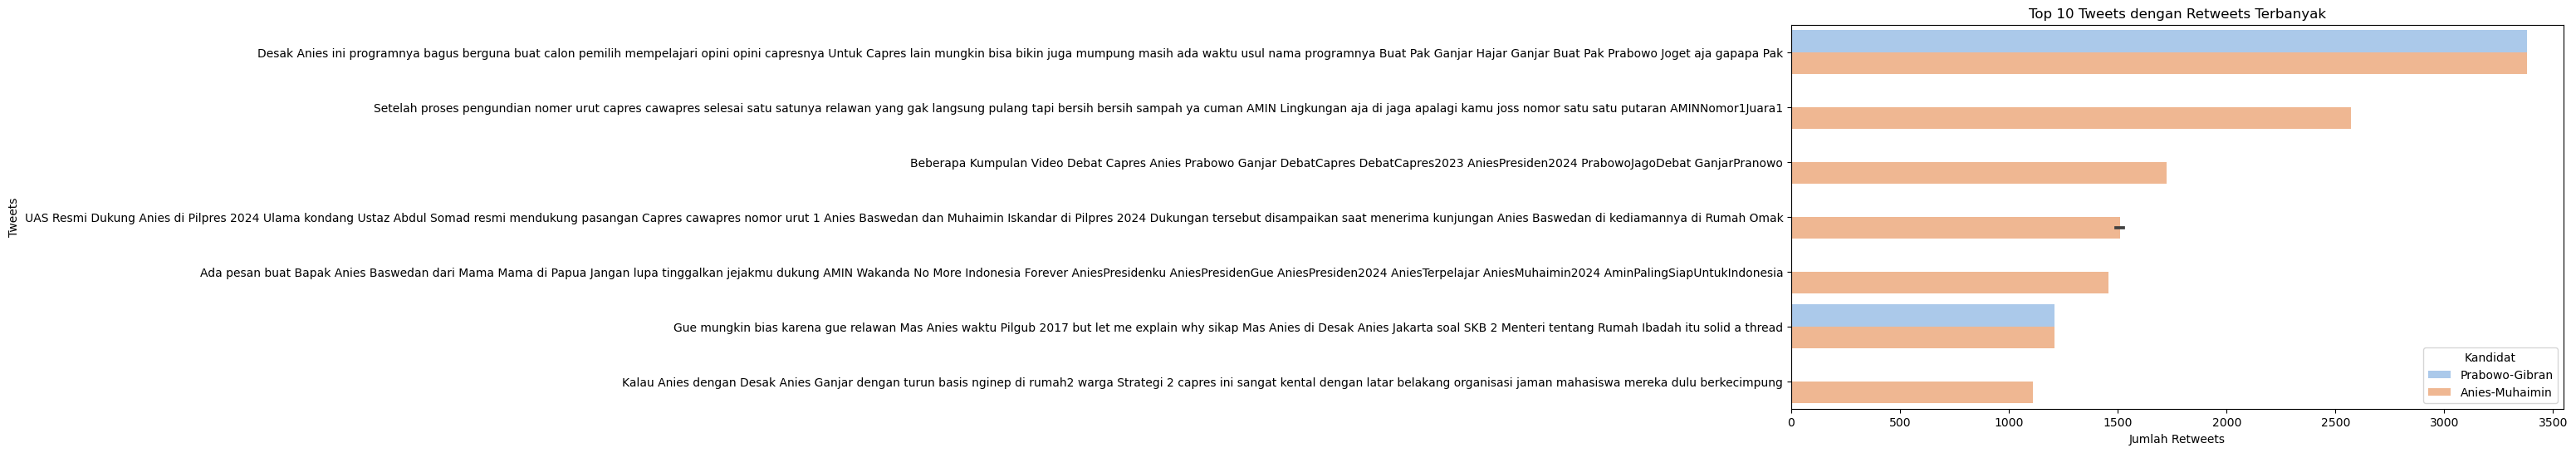

In [152]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_retweets, x='retweet_count', y='full_text', hue='Kandidat', palette='pastel')
plt.title('Top 10 Tweets dengan Retweets Terbanyak')
plt.xlabel('Jumlah Retweets')
plt.ylabel('Tweets')
plt.show()

In [1]:
# sentiment['created_at'] = pd.to_datetime(sentiment['created_at'])

# # Filter data hanya untuk tahun 2023
# sentiment_2023 = sentiment[sentiment['created_at'].dt.year == 2023]

# sentiment_2023['month'] = sentiment_2023['created_at'].dt.strftime('%b-%Y')

# # Hitung rata-rata skor polaritas untuk setiap bulan dan kandidat
# average_polarity_by_month_and_candidate = sentiment_2023.groupby(['month', 'Kandidat'])['sentiment_polarity'].mean().reset_index(name='Rata_Rata_Polaritas')

# # Plot menggunakan Seaborn
# plt.figure(figsize=(15, 6), facecolor='#F0F3F8')
# sns.lineplot(x='month', y='Rata_Rata_Polaritas', hue='Kandidat', data=average_polarity_by_month_and_candidate, ci=None)

# plt.title('Rata-rata Skor Polaritas Berdasarkan Bulan dan Kandidat (Tahun 2023)')
# plt.xlabel('Bulan Posting')
# plt.ylabel('Rata-rata Skor Polaritas')
# plt.xticks(rotation=45) 
# plt.legend(title='Kandidat', loc='upper right')
# ax.set_facecolor('#F0F3F8')
# plt.show()

## Model Mechine Learning

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Data Spilitting

In [22]:
X = sentiment['full_text']
y = sentiment['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X

0        Jaringan Perempuan Nahdliyin untuk ANIS MUHAIM...
1        Setelah melihat debat kemaren tanpa pikir panj...
2               Isi Komen banyak Anis Muhaimin AMIN menang
3                      Telak banget ya AnisMuhaimin mantap
4        anies Ampe julurin lidah ya kayak itu tu AnisM...
                               ...                        
10374    AYO DUKUNG GANJAR MAHFUD UNTUK INDONESIA MAJU ...
10375    AYO DUKUNG GANJAR MAHFUD UNTUK INDONESIA MAJU ...
10376    YoshY83919872 Sul Samsul ini kelepas dari sisi...
10377    Salut buat Diaspora pilih dukung Ganjar Mahfud...
10378    Cak imin payah harusnya langsung balas Anda ju...
Name: full_text, Length: 10379, dtype: object

In [24]:
y

0        Positif
1        Positif
2        Positif
3        Positif
4         Netral
          ...   
10374     Netral
10375     Netral
10376    Positif
10377    Positif
10378    Negatif
Name: sentiment, Length: 10379, dtype: object

- Vekctorisasi

In [25]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [26]:
model = SVC()
model.fit(X_train_tfidf, y_train)

SVC()

In [27]:
y_pred = model.predict(X_test_tfidf)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7755298651252408
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.89      0.45      0.60       329
      Netral       0.85      0.67      0.75       646
     Positif       0.74      0.93      0.82      1101

    accuracy                           0.78      2076
   macro avg       0.82      0.69      0.72      2076
weighted avg       0.79      0.78      0.76      2076



In [31]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [32]:
knn_model.fit(X_train_tfidf, y_train)

# Membuat prediksi
knn_predictions = knn_model.predict(X_test_tfidf)

# Mengukur akurasi
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# Classification Report
knn_classification_report = classification_report(y_test, knn_predictions)
print("Classification Report for KNN:")
print(knn_classification_report)

KNN Accuracy: 0.6122350674373795
Classification Report for KNN:
              precision    recall  f1-score   support

     Negatif       0.51      0.35      0.41       329
      Netral       0.52      0.71      0.60       646
     Positif       0.72      0.63      0.68      1101

    accuracy                           0.61      2076
   macro avg       0.58      0.56      0.56      2076
weighted avg       0.62      0.61      0.61      2076



In [34]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [35]:
model_lr.fit(X_train_tfidf, y_train)

# Membuat prediksi
y_pred = model_lr.predict(X_test_tfidf)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

     Negatif       0.78      0.36      0.49       329
      Netral       0.77      0.68      0.73       646
     Positif       0.74      0.91      0.81      1101

    accuracy                           0.75      2076
   macro avg       0.76      0.65      0.68      2076
weighted avg       0.76      0.75      0.73      2076



/Users/muhaiminnur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Sample Testing

In [36]:
def predict_sentiment(full_text):
    review_tfidf = vectorizer.transform([full_text])
    sentiment = model.predict(review_tfidf)
    return sentiment[0]

In [37]:
new_review = "Setelah melihat debat kemaren tanpa pikir panjang sy dan warga sekampung pun langsung beralih mendukung Anis Muhaimin Alasannya sederhana karna kami masih waras"
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Positif


In [38]:
new_review = "anis muhaimin di nomor 1 jangan yg lain amin aja dulu"
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Positif


In [39]:
new_review = "GIBRAN KOMPOR PERTAMA KALI DALAM SEJARAH KPU TEGUR CAWAPRES BELUM TAMPIL DEBAT SUDAH TERCELA"
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Negatif


In [40]:
new_review = "Gibran bodoh tolol"
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Negatif


In [41]:
new_review = "Anis bodoh tolol"
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Negatif


In [42]:
new_review = "Prabowo Jahat, Rasis, Bodoh, Tolol juga"
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Negatif


In [44]:
new_review = "Seluruh kandidat memiliki wawasan dan pengetahuan masing-masing yang tentunya kapasitasnya berbeda-beda, siapapun yang jadi presiden tahun 2024 itulah yang terbaik pilihan rakyat"
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Netral


In [74]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10379 entries, 0 to 10378
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10379 non-null  int64  
 1   created_at          10379 non-null  object 
 2   full_text           10379 non-null  object 
 3   quote_count         10379 non-null  float64
 4   reply_count         10379 non-null  int64  
 5   retweet_count       10379 non-null  float64
 6   favorite_count      10379 non-null  float64
 7   username            10379 non-null  object 
 8   tweet_url           10379 non-null  object 
 9   Kandidat            10379 non-null  object 
 10  sentiment_polarity  10379 non-null  float64
 11  sentiment           10379 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 973.2+ KB
